In [1]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier

/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework

In [2]:
train_df = pd.read_csv('H1full.csv')
a=train_df.head()
b=train_df
b
b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,August,35,31,2,8,2,1,...,No Deposit,143,NULL,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,0,169,2017,August,35,30,2,9,2,0,...,No Deposit,250,NULL,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,0,204,2017,August,35,29,4,10,2,0,...,No Deposit,250,NULL,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,0,211,2017,August,35,31,4,10,2,0,...,No Deposit,40,NULL,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [3]:
# Interval variables
leadtime = train_df['LeadTime']
arrivaldateyear = train_df['ArrivalDateYear']
arrivaldateweekno = train_df['ArrivalDateWeekNumber']
arrivaldatedayofmonth = train_df['ArrivalDateDayOfMonth']
staysweekendnights = train_df['StaysInWeekendNights']
staysweeknights = train_df['StaysInWeekNights']
adults = train_df['Adults']
children = train_df['Children']
babies = train_df['Babies']
isrepeatedguest = train_df['IsRepeatedGuest'] 
previouscancellations = train_df['PreviousCancellations']
previousbookingsnotcanceled = train_df['PreviousBookingsNotCanceled']
bookingchanges = train_df['BookingChanges']
agent = train_df['Agent']
company = train_df['Company']
dayswaitinglist = train_df['DaysInWaitingList']
adr = train_df['ADR']
rcps = train_df['RequiredCarParkingSpaces']
totalsqr = train_df['TotalOfSpecialRequests']

In [4]:
y1 = np.array(leadtime)

In [5]:
# Categorical variables
IsCanceled = train_df['IsCanceled']
arrivaldatemonth = train_df.ArrivalDateMonth.astype("category").cat.codes
arrivaldatemonthcat=pd.Series(arrivaldatemonth)
mealcat=train_df.Meal.astype("category").cat.codes
mealcat=pd.Series(mealcat)
countrycat=train_df.Country.astype("category").cat.codes
countrycat=pd.Series(countrycat)
marketsegmentcat=train_df.MarketSegment.astype("category").cat.codes
marketsegmentcat=pd.Series(marketsegmentcat)
distributionchannelcat=train_df.DistributionChannel.astype("category").cat.codes
distributionchannelcat=pd.Series(distributionchannelcat)
reservedroomtypecat=train_df.ReservedRoomType.astype("category").cat.codes
reservedroomtypecat=pd.Series(reservedroomtypecat)
assignedroomtypecat=train_df.AssignedRoomType.astype("category").cat.codes
assignedroomtypecat=pd.Series(assignedroomtypecat)
deposittypecat=train_df.DepositType.astype("category").cat.codes
deposittypecat=pd.Series(deposittypecat)
customertypecat=train_df.CustomerType.astype("category").cat.codes
customertypecat=pd.Series(customertypecat)
reservationstatuscat=train_df.ReservationStatus.astype("category").cat.codes
reservationstatuscat=pd.Series(reservationstatuscat)

In [6]:
x1 = np.column_stack((IsCanceled,countrycat,marketsegmentcat,deposittypecat,customertypecat,rcps,arrivaldateyear,arrivaldatemonthcat,arrivaldateweekno,arrivaldatedayofmonth))
x1 = sm.add_constant(x1, prepend=True)

In [7]:
#Variables
y1=np.reshape(y1, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x1))
xscale=scaler_x.transform(x1)
print(scaler_y.fit(y1))
yscale=scaler_y.transform(y1)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [8]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
#math.sqrt(sc.inverse_transform([mse]))
history=model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)
predictions = model.predict(X_test)

Train on 24036 samples, validate on 6009 samples
Epoch 1/150
24036/24036 [==============================] - 0s 19us/sample - loss: 0.0154 - mse: 0.0154 - mae: 0.0998 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0951
Epoch 2/150
24036/24036 [==============================] - 0s 12us/sample - loss: 0.0133 - mse: 0.0133 - mae: 0.0916 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0866
Epoch 3/150
24036/24036 [==============================] - 0s 12us/sample - loss: 0.0122 - mse: 0.0122 - mae: 0.0861 - val_loss: 0.0122 - val_mse: 0.0122 - val_mae: 0.0844
Epoch 4/150
24036/24036 [==============================] - 0s 14us/sample - loss: 0.0116 - mse: 0.0116 - mae: 0.0836 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0811
Epoch 5/150
24036/24036 [==============================] - 0s 13us/sample - loss: 0.0114 - mse: 0.0114 - mae: 0.0824 - val_loss: 0.0115 - val_mse: 0.0115 - val_mae: 0.0832
Epoch 6/150
24036/24036 [==============================] - 0s 16us/sample - loss: 0.0112 - 

24036/24036 [==============================] - 0s 19us/sample - loss: 0.0100 - mse: 0.0100 - mae: 0.0753 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0743
Epoch 49/150
24036/24036 [==============================] - 0s 19us/sample - loss: 0.0101 - mse: 0.0101 - mae: 0.0751 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0760
Epoch 50/150
24036/24036 [==============================] - 0s 19us/sample - loss: 0.0100 - mse: 0.0100 - mae: 0.0751 - val_loss: 0.0104 - val_mse: 0.0104 - val_mae: 0.0754
Epoch 51/150
24036/24036 [==============================] - 0s 19us/sample - loss: 0.0100 - mse: 0.0100 - mae: 0.0753 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0772
Epoch 52/150
24036/24036 [==============================] - 0s 19us/sample - loss: 0.0100 - mse: 0.0100 - mae: 0.0752 - val_loss: 0.0104 - val_mse: 0.0104 - val_mae: 0.0747
Epoch 53/150
24036/24036 [==============================] - 0s 18us/sample - loss: 0.0100 - mse: 0.0100 - mae: 0.0750 - val_loss: 0.0107 - val_mse: 

24036/24036 [==============================] - 0s 19us/sample - loss: 0.0099 - mse: 0.0099 - mae: 0.0745 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0751
Epoch 96/150
24036/24036 [==============================] - 0s 19us/sample - loss: 0.0099 - mse: 0.0099 - mae: 0.0744 - val_loss: 0.0104 - val_mse: 0.0104 - val_mae: 0.0745
Epoch 97/150
24036/24036 [==============================] - 0s 19us/sample - loss: 0.0099 - mse: 0.0099 - mae: 0.0744 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0765
Epoch 98/150
24036/24036 [==============================] - 0s 19us/sample - loss: 0.0099 - mse: 0.0099 - mae: 0.0746 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0758
Epoch 99/150
24036/24036 [==============================] - 1s 23us/sample - loss: 0.0098 - mse: 0.0098 - mae: 0.0744 - val_loss: 0.0104 - val_mse: 0.0104 - val_mae: 0.0747
Epoch 100/150
24036/24036 [==============================] - 1s 23us/sample - loss: 0.0099 - mse: 0.0099 - mae: 0.0745 - val_loss: 0.0102 - val_mse:

24036/24036 [==============================] - 0s 20us/sample - loss: 0.0098 - mse: 0.0098 - mae: 0.0742 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0754
Epoch 143/150
24036/24036 [==============================] - 0s 20us/sample - loss: 0.0098 - mse: 0.0098 - mae: 0.0741 - val_loss: 0.0105 - val_mse: 0.0105 - val_mae: 0.0746
Epoch 144/150
24036/24036 [==============================] - 1s 22us/sample - loss: 0.0098 - mse: 0.0098 - mae: 0.0743 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0754
Epoch 145/150
24036/24036 [==============================] - 1s 21us/sample - loss: 0.0098 - mse: 0.0098 - mae: 0.0742 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0739
Epoch 146/150
24036/24036 [==============================] - 0s 20us/sample - loss: 0.0098 - mse: 0.0098 - mae: 0.0741 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0749
Epoch 147/150
24036/24036 [==============================] - 1s 21us/sample - loss: 0.0098 - mse: 0.0098 - mae: 0.0741 - val_loss: 0.0102 - val_

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


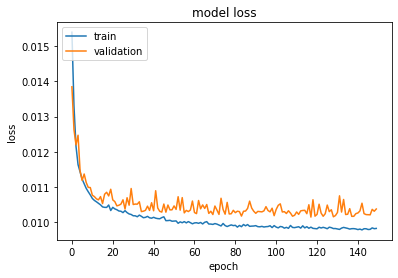

In [10]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [11]:
h2data = pd.read_csv('H2full.csv')
a=h2data.head()
a

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [12]:
t_leadtime = h2data['LeadTime'] #1
t_arrivaldateyear = h2data['ArrivalDateYear']
t_arrivaldateweekno = h2data['ArrivalDateWeekNumber']
t_arrivaldatedayofmonth = h2data['ArrivalDateDayOfMonth']
t_staysweekendnights = h2data['StaysInWeekendNights'] #2
t_staysweeknights = h2data['StaysInWeekNights'] #3
t_adults = h2data['Adults'] #4
t_children = h2data['Children'] #5
t_babies = h2data['Babies'] #6
t_isrepeatedguest = h2data['IsRepeatedGuest'] #11
t_previouscancellations = h2data['PreviousCancellations'] #12
t_previousbookingsnotcanceled = h2data['PreviousBookingsNotCanceled'] #13
t_bookingchanges = h2data['BookingChanges'] #16
t_agent = h2data['Agent'] #18
t_company = h2data['Company'] #19
t_dayswaitinglist = h2data['DaysInWaitingList'] #20
t_adr = h2data['ADR'] #22
t_rcps = h2data['RequiredCarParkingSpaces'] #23
t_totalsqr = h2data['TotalOfSpecialRequests'] #24

In [13]:
# Categorical variables
t_IsCanceled = h2data['IsCanceled']
t_arrivaldatemonth = h2data.ArrivalDateMonth.astype("category").cat.codes
t_arrivaldatemonthcat = pd.Series(t_arrivaldatemonth)
t_mealcat=h2data.Meal.astype("category").cat.codes
t_mealcat=pd.Series(t_mealcat)
t_countrycat=h2data.Country.astype("category").cat.codes
t_countrycat=pd.Series(t_countrycat)
t_marketsegmentcat=h2data.MarketSegment.astype("category").cat.codes
t_marketsegmentcat=pd.Series(t_marketsegmentcat)
t_distributionchannelcat=h2data.DistributionChannel.astype("category").cat.codes
t_distributionchannelcat=pd.Series(t_distributionchannelcat)
t_reservedroomtypecat=h2data.ReservedRoomType.astype("category").cat.codes
t_reservedroomtypecat=pd.Series(t_reservedroomtypecat)
t_assignedroomtypecat=h2data.AssignedRoomType.astype("category").cat.codes
t_assignedroomtypecat=pd.Series(t_assignedroomtypecat)
t_deposittypecat=h2data.DepositType.astype("category").cat.codes
t_deposittypecat=pd.Series(t_deposittypecat)
t_customertypecat=h2data.CustomerType.astype("category").cat.codes
t_customertypecat=pd.Series(t_customertypecat)
t_reservationstatuscat=h2data.ReservationStatus.astype("category").cat.codes
t_reservationstatuscat=pd.Series(t_reservationstatuscat)

In [14]:
atest = np.column_stack((t_IsCanceled,t_countrycat,t_marketsegmentcat,t_deposittypecat,t_customertypecat,t_rcps,t_arrivaldateyear,t_arrivaldatemonthcat,t_arrivaldateweekno,t_arrivaldatedayofmonth))
atest = sm.add_constant(atest, prepend=True)
btest = t_leadtime
btest=btest.values

In [15]:
np.shape(atest)

(79330, 11)

In [16]:
scaler_atest = MinMaxScaler()
print(scaler_atest.fit(atest))
ascale=scaler_atest.transform(atest)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [17]:
np.shape(ascale)

(79330, 11)

In [18]:
bpred = model.predict(ascale)
bpred

array([[0.14234653],
       [0.1824913 ],
       [0.1824913 ],
       ...,
       [0.17587967],
       [0.18028635],
       [0.17660226]], dtype=float32)

In [19]:
bpred = scaler_y.inverse_transform(bpred)

In [20]:
bpred

array([[104.90939],
       [134.4961 ],
       [134.4961 ],
       ...,
       [129.62332],
       [132.87103],
       [130.15587]], dtype=float32)

In [21]:
btest

array([  6,  88,  65, ...,  34, 109, 205])

In [22]:
np.shape(btest)

(79330,)

In [23]:
np.shape(bpred)

(79330, 1)

In [24]:
bpred=np.reshape(bpred, (79330,)) 

In [25]:
np.shape(bpred)

(79330,)

In [40]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mean_absolute_error(btest, bpred)

77.46638423749249

In [48]:
mean_squared_error(btest, bpred)

10241.168379069535

In [50]:
math.sqrt(mean_squared_error(btest, bpred))

101.19865799045724

In [44]:
np.mean(btest)

109.73572419009201

In [45]:
np.mean(bpred)

131.4731